## Bored with Common data

    Do some practice with your daily routine!!! 😁
    
    
    Let's Start the Fun!!!!

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### 1. read the dataset and store it into a variable

In [3]:
df = pd.read_csv("netflix_titles.csv")

### 2. Prepare the dataset as follows

In [40]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### 3. Content Type on netflix

In [41]:
#f = df["type"].value_counts()
labels = df.groupby("type").count()["show_id"].index
values= df.groupby("type").count()["show_id"].values

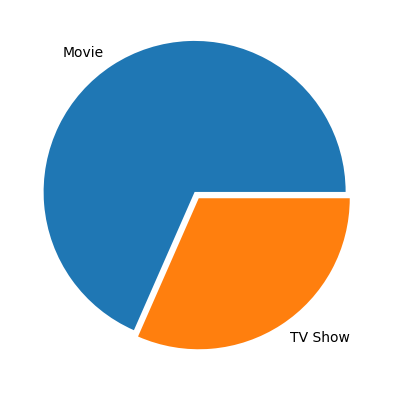

In [42]:
plt.pie(values,labels = labels,explode=[0.05,0])
plt.show()


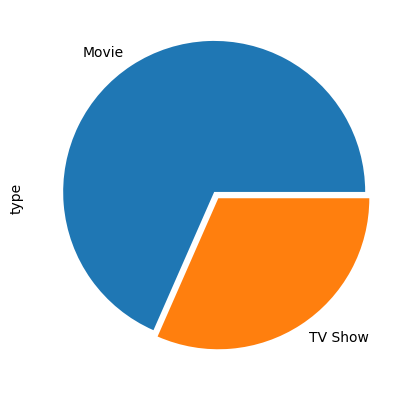

In [43]:
df["type"].value_counts().plot.pie(explode=[0.05,0])

### 4. Growth in content over the years

In [4]:
df["date_added"]

0       September 9, 2019
1       September 9, 2016
2       September 8, 2018
3       September 8, 2018
4       September 8, 2017
              ...        
6229                  NaN
6230                  NaN
6231                  NaN
6232                  NaN
6233                  NaN
Name: date_added, Length: 6234, dtype: object

In [22]:
df['year_added'] = df['date_added'].apply(lambda x: int(x.split(", ")[-1]) if isinstance(x, str) else x)

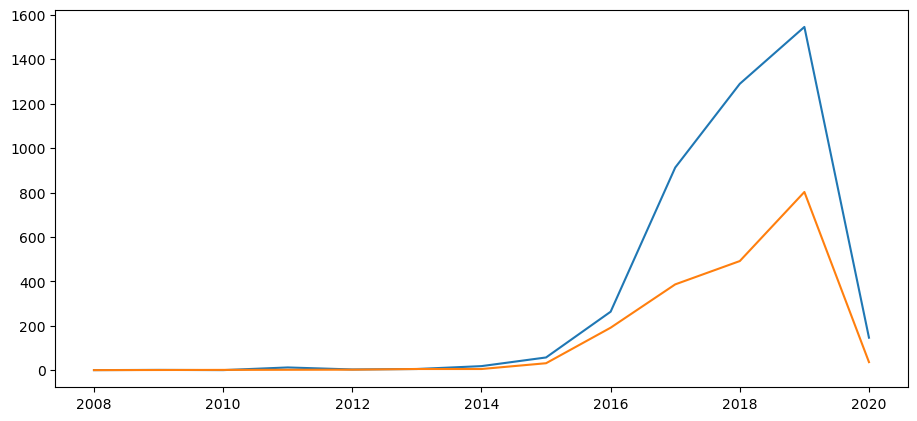

In [33]:
df[df['type'] == "Movie"]['year_added'].value_counts().sort_index().plot(label="MOVIE")
df[df['type'] == "TV Show"]['year_added'].value_counts().sort_index().plot(label="TV SHOW")

### 5. Original Release Year of the movies

In [20]:
plt.rcParams['figure.figsize'] = 11, 5
plt.rcParams['figure.dpi'] = 100

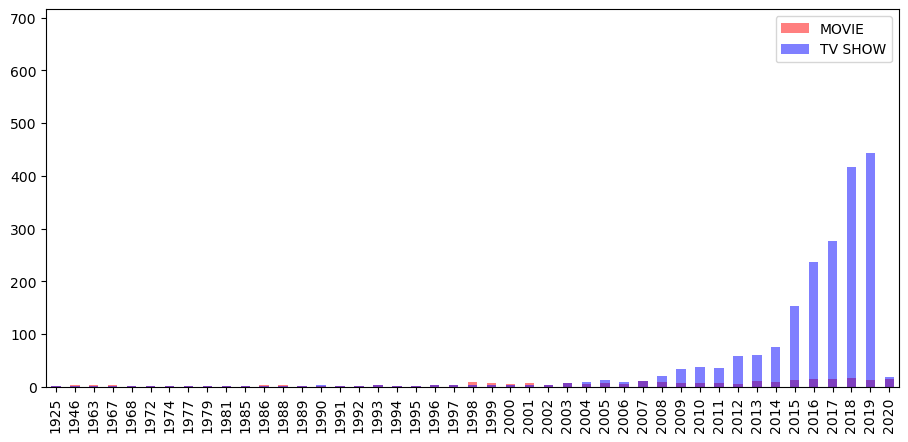

In [21]:
df[df['type'] == "Movie"]['release_year'].value_counts().sort_index().plot(kind='bar', label="MOVIE", color='red', alpha=0.5)
df[df['type'] == "TV Show"]['release_year'].value_counts().sort_index().plot(kind='bar', label="TV SHOW", color='blue', alpha=0.5)
plt.legend()

### 6. Some of the oldest movies on Netflix

In [77]:
df[df["type"] == "Movie"][["title","release_year"]].sort_values(by="release_year",ascending=True)[:16]

,title,release_year
2013,The Battle of Midway,1942
2011,Prelude to War,1942
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2022,Undercover: How to Operate Behind Enemy Lines,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2009,Nazi Concentration Camps,1945
2005,Know Your Enemy - Japan,1945


### 7. Some of the oldest TV Shows on Netflix

In [78]:
df[df["type"] == "TV Show"][["title","release_year"]].sort_values(by="release_year",ascending=True)[:16]

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
4079,Pioneers of African-American Cinema,1946
5981,The Twilight Zone (Original Series),1963
5980,The Andy Griffith Show,1967
5704,Star Trek,1968
614,Monty Python's Fliegender Zirkus,1972
5669,Monty Python's Flying Circus,1974
5830,Dad's Army,1977
4273,El Chavo,1979
4369,Ninja Hattori,1981


### 8.  Distribution of Movie Duration

In [5]:
f  = df[df["type"] == "Movie"].duration

In [6]:
f

0        90 min
1        94 min
4        99 min
6       110 min
7        60 min
         ...   
5577     70 min
5578    102 min
5579     88 min
5580    109 min
6231     60 min
Name: duration, Length: 4265, dtype: object

In [45]:
f.apply(lambda x: x.split(" ")[0]).astype(int).describe()

count    4265.000000
mean       99.100821
std        28.074857
min         3.000000
25%        86.000000
50%        98.000000
75%       115.000000
max       312.000000
Name: duration, dtype: float64

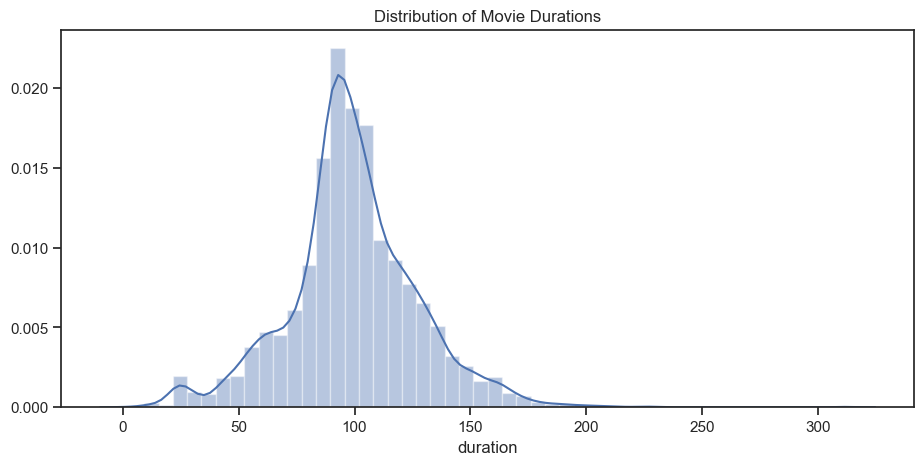

In [46]:
sns.set(style='ticks')

sns.distplot(f.apply(lambda x: x.split(" ")[0]).astype(int)).set_title('Distribution of Movie Durations')
plt.show()

### 9. TV Shows with how many seasons

In [47]:
f = df[df["type"] == "TV Show"]["duration"].apply(lambda x: x.split(" ")[0]).astype(int).sort_values(ascending=False)

In [48]:
f

5974    15
5908    15
5787    14
6229    13
6021    13
        ..
3863     1
3864     1
3865     1
3867     1
2        1
Name: duration, Length: 1969, dtype: int32

### 10.  What are the ratings of content

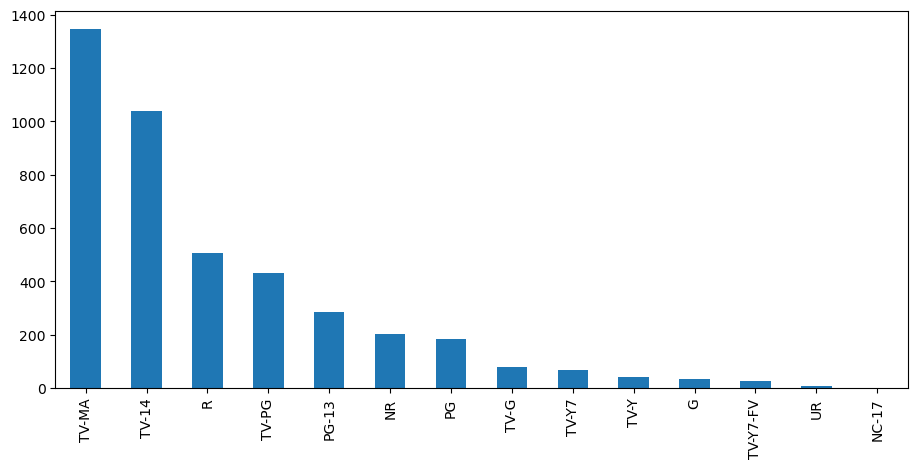

In [34]:
df[df['type'] == "Movie"]['rating'].value_counts().plot(kind='bar')

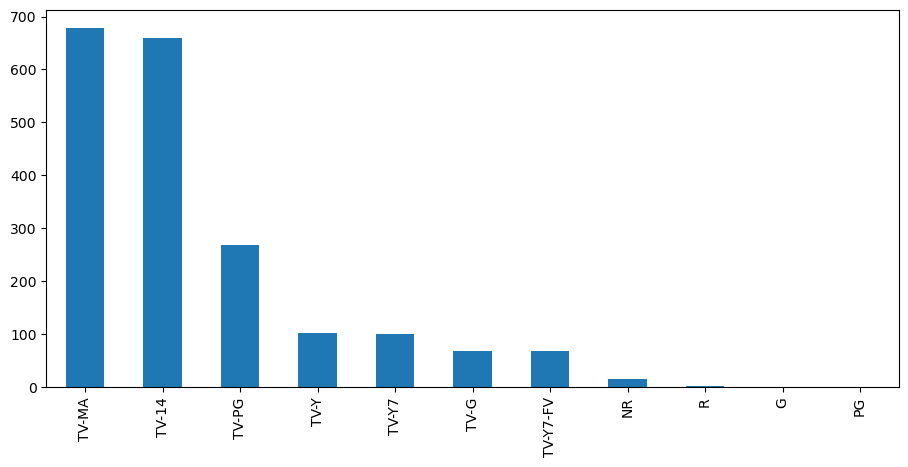

In [36]:
df[df['type'] == "TV Show"]['rating'].value_counts().plot(kind='bar')

### 11. StandUp Comedies on Netflix

In [49]:
df[(df["listed_in"] == "Stand-Up Comedy") & (df["country"] == "United States")][["title","country","release_year"]]

,title,country,release_year
53,Marc Maron: Too Real,United States,2017
113,Def Comedy Jam 25,United States,2017
126,Jeff Dunham: Beside Himself,United States,2019
134,Iliza Shlesinger: Confirmed Kills,United States,2016
181,Jerry Before Seinfeld,United States,2017
...,...,...,...
5380,Lucas Brothers: On Drugs,United States,2017
5389,Chris D'Elia: Incorrigible,United States,2015
5411,Eddie Murphy: Delirious,United States,1983
5461,Kevin Hart: What Now?,United States,2016


In [50]:
df[df["country"] == "India"][["title","release_year","country"]]

,title,release_year,country
35,Article 15,2019,India
37,Ee Nagaraniki Emaindi,2018,India
41,PK,2014,India
58,Watchman,2019,India
99,Bard of Blood,2019,India
...,...,...,...
5573,The Human Factor: The Untold Story of the Bomb...,2013,India
5708,Little Things,2019,India
5839,The House That Made Me,2015,India
5867,Sab Jholmaal Hai,2017,India


In [163]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...


In [90]:
a = df[df['type'] == 'Movie']["country"].apply(lambda x: x.split(",") if type(x) == str else x)

In [91]:
a

0       [United States,  India,  South Korea,  China]
1                                    [United Kingdom]
4                                     [United States]
6         [Bulgaria,  United States,  Spain,  Canada]
7                                             [Chile]
                            ...                      
5577                                  [United States]
5578                                  [United States]
5579                                  [United States]
5580                                  [United States]
6231                                              NaN
Name: country, Length: 4265, dtype: object

In [104]:
df[(df["release_year"] == 2015) & (df["type"] == "Movie")]["show_id"].count()

363

In [108]:
for i in df["release_year"].unique():
    t  =df[(df["release_year"] == i) & (df["type"] == "Movie")]["show_id"].count()
    print(i,"--->",t)

2019 ---> 400
2016 ---> 593
2013 ---> 177
2017 ---> 682
2014 ---> 213
2015 ---> 363
2009 ---> 87
2012 ---> 125
2010 ---> 111
2018 ---> 646
2011 ---> 100
2004 ---> 40
2000 ---> 28
1983 ---> 9
1982 ---> 11
2006 ---> 59
2005 ---> 51
2002 ---> 35
1997 ---> 27
2008 ---> 87
2007 ---> 60
2003 ---> 35
1981 ---> 6
1991 ---> 14
1994 ---> 13
1988 ---> 11
1976 ---> 7
1973 ---> 9
1974 ---> 7
1989 ---> 10
1986 ---> 8
1984 ---> 8
1978 ---> 7
1998 ---> 23
1972 ---> 3
1979 ---> 6
1960 ---> 4
1959 ---> 1
2001 ---> 30
1995 ---> 15
1992 ---> 14
1990 ---> 12
1975 ---> 5
1985 ---> 7
1980 ---> 7
1970 ---> 1
1996 ---> 14
1967 ---> 2
1999 ---> 17
1987 ---> 5
1968 ---> 3
1993 ---> 16
2020 ---> 6
1958 ---> 2
1965 ---> 2
1956 ---> 1
1962 ---> 3
1955 ---> 1
1977 ---> 4
1945 ---> 3
1946 ---> 2
1942 ---> 2
1944 ---> 3
1947 ---> 1
1943 ---> 3
1969 ---> 2
1954 ---> 1
1966 ---> 1
1971 ---> 3
1964 ---> 1
1925 ---> 0
1963 ---> 0


In [158]:
df= pd.read_csv("netflix_titles1.csv")

In [159]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [151]:
df["country"]

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                  NaN
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object

In [195]:
temp = df[df['type'] == "Movie"]

country=[]
country1=[]
for i in temp['country']:
    if type(i) == str:
        f = i.lower().split(",")
        country.extend(f)
for i in country:
    country1.append(i.strip())
        
    

In [196]:
pd.Series(country1).value_counts()

united states     2431
india              915
united kingdom     467
canada             286
france             265
                  ... 
sri lanka            1
malawi               1
montenegro           1
paraguay             1
sudan                1
Length: 111, dtype: int64

In [198]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


##### Take input of desc and type then show the movie/tv show according to it

In [3]:
desc = input("\n Search value for which type of movie/shows you which : ").strip().lower()
type_ = input("\n Enter type (Movie/Series) : ").strip().title()
temp = df[df['description'].apply(lambda x:True if desc in str(x).lower() else False)]
if type_ == "Series":
    print(temp[temp['type'] == "TV Show"][['type','title']][:10])
elif type_ == "Movie":
    print(temp[temp['type'] == "Movie"][['type','title']][:10])
else:
    print("\n INCORRECT TYPE")


 Search value for which type of movie/shows you which : comedie

 Enter type (Movie/Series) : Movie
       type          title
2789  Movie  Brahman Naman


##### Take input of number of seasons then show TV shows according to it

In [4]:
n = int(input("\nEnter the number of seasons: "))
temp = df[df['type']=='TV Show']
temp[temp['duration'].apply(lambda x: True if (int(x.split()[0])==n) else False)]


Enter the number of seasons: 4


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5592,70283260,TV Show,Reign,NaN,"Adelaide Kane, Megan Follows, Torrance Coombs,...",United States,"September 5, 2017",2017,TV-14,4 Seasons,TV Dramas,This vivid historical drama series tells of th...
5601,80131479,TV Show,Terrace House: Aloha State,NaN,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...","United States, Japan","September 26, 2017",2017,TV-14,4 Seasons,"International TV Shows, Reality TV",The beautiful island of Oahu is host to a new ...
5604,80059465,TV Show,Locked Up,NaN,"Maggie Civantos, Najwa Nimri, Carlos Hipólito,...",Spain,"September 25, 2019",2019,TV-MA,4 Seasons,"Crime TV Shows, International TV Shows, Spanis...",Manipulated into embezzling funds for her boyf...
5609,80011539,TV Show,VeggieTales in the House,NaN,"Phil Vischer, Mike Nawrocki, Rob Paulsen, Tres...",United States,"September 23, 2016",2016,TV-Y,4 Seasons,Kids' TV,"Bob the Tomato, Larry the Cucumber and their V..."
5615,70242079,TV Show,Beauty & the Beast,NaN,"Kristin Kreuk, Jay Ryan, Max Brown, Austin Bas...",Canada,"September 19, 2016",2016,TV-14,4 Seasons,"Crime TV Shows, Romantic TV Shows, TV Dramas",A homicide detective and a veteran who has bee...
...,...,...,...,...,...,...,...,...,...,...,...,...
6197,80987209,TV Show,"Rica, Famosa, Latina",NaN,NaN,United States,"April 26, 2019",2016,TV-14,4 Seasons,"International TV Shows, Reality TV, Spanish-La...",This reality series follows the lives of a gro...
6200,80018869,TV Show,Liv and Maddie,NaN,"Dove Cameron, Joey Bragg, Tenzing Norgay Train...",United States,"April 23, 2017",2017,TV-G,4 Seasons,"Kids' TV, TV Comedies",After four years in Hollywood as a television ...
6201,80050007,TV Show,The Mr. Peabody and Sherman Show,NaN,"Chris Parnell, Max Charles, Dieter Jansen, Da'...",United States,"April 21, 2017",2017,TV-Y7,4 Seasons,"Kids' TV, TV Comedies",Mr. Peabody and Sherman host a zany late-night...
6215,80066227,TV Show,Crazy Ex-Girlfriend,NaN,"Rachel Bloom, Vincent Rodriguez III, Santino F...",United States,"April 13, 2019",2019,TV-14,4 Seasons,"Romantic TV Shows, TV Comedies","Still pining for Josh, the boy who dumped her ..."


### OR

In [7]:
def check(x, val):
    if "season" in x.lower():
        if str(val) in x:
            return True
    return False

In [8]:
df[df['duration'].apply(lambda x: check(x, 1))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6121,80074152,TV Show,Sensitive Skin,NaN,"Kim Cattrall, Don McKellar, Nicolas Wright, Jo...",Canada,"December 1, 2019",2016,TV-MA,1 Season,TV Comedies,Davina and Al try to revamp their lives as the...
6174,70171946,TV Show,Heartland,NaN,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,"August 1, 2019",2017,TV-PG,11 Seasons,TV Dramas,Spunky teenager Amy is reeling from the sudden...
6225,70153412,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


##### find the number of movies per year and tv shows per year from 2010 to 2020

In [264]:
for i in range(2010,2021):
    t =df[(df["type"] == "Movie") & (df["release_year"] == i)].shape[0]
    print(i,"-->",t)

2010 --> 136
2011 --> 127
2012 --> 158
2013 --> 202
2014 --> 244
2015 --> 382
2016 --> 642
2017 --> 744
2018 --> 734
2019 --> 582
2020 --> 411


In [266]:
for i in range(2010,2021):
    t =df[(df["type"] == "TV Show") & (df["release_year"] == i)].shape[0]
    print(i,"-->",t)

2010 --> 37
2011 --> 39
2012 --> 61
2013 --> 65
2014 --> 90
2015 --> 159
2016 --> 240
2017 --> 268
2018 --> 387
2019 --> 414
2020 --> 457


### OR

In [268]:
movie = {}
tv_show = {}
for i in range(2010, 2021):
    movie[i] = df[(df['type'] == "Movie") & (df['release_year'] == i)].__len__()
    tv_show[i] = df[(df['type'] == "TV Show") & (df['release_year'] == i)].__len__()

In [269]:
movie

{2010: 136,
 2011: 127,
 2012: 158,
 2013: 202,
 2014: 244,
 2015: 382,
 2016: 642,
 2017: 744,
 2018: 734,
 2019: 582,
 2020: 411}

In [270]:
tv_show

{2010: 37,
 2011: 39,
 2012: 61,
 2013: 65,
 2014: 90,
 2015: 159,
 2016: 240,
 2017: 268,
 2018: 387,
 2019: 414,
 2020: 457}

#### In which month maximum movie/tv show are maximum 

In [9]:
df['date_added'].apply(lambda x: str(x).split()[0]).value_counts()

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
nan           11
Name: date_added, dtype: int64

#### Find Top 10 Genres

In [44]:
genres=[]
for i in df["listed_in"]:
    if type(i) == str:
        genres.extend(map(lambda x : x.strip(),i.lower().split(",")))
    
pd.Series(genres).value_counts()[:10]
        

international movies      1927
dramas                    1623
comedies                  1113
international tv shows    1001
documentaries              668
tv dramas                  599
action & adventure         597
independent movies         552
tv comedies                436
thrillers                  392
dtype: int64

##### Which type of genre mostly used in Indian Movie or Tv shows 

In [53]:
 f = df[df["country"] == "India"]["listed_in"].values

In [64]:
genre=[]
for i in f:
    if type(i) == str:
        genre.extend(map(lambda x: x.strip(),i.lower().split(",")))

pd.Series(genre).value_counts()[:10]

international movies      679
dramas                    506
comedies                  232
action & adventure        118
independent movies        112
romantic movies            89
music & musicals           85
thrillers                  67
international tv shows     47
horror movies              26
dtype: int64